# **Feedforward Neural Network**
Feedforward neural networks are the simplest type of artificial neural network, in which information flows in one direction, from the input layer through one or more hidden layers to the output layer. They serves a huge variety of tasks; we will see few examples of generic **function approximations**.

## **Linear Neural Networks**
These are the simplest possible networks available, and they are exactly the same thing as the usual *linear regression*. In general, these types of networks have only one layer which leads directly to the output, in other words:
\begin{equation*}
f(\vec{x}) = y = \vec{w}^T\cdot \vec{x} + b\;,
\end{equation*}
where $\vec{x}$ is a vector containing all the *features* related to the observed object, $\vec{w}$ is the weights vector with the same dimesionality as $\vec{x}$ and $b$ is the bias. Of course, $\vec{x}$ could also be one dimensional, for example in the very well known case of *spatial points* on an axis; in this case we would only have one parameter too - in addition to the bias - thus the usual line $y=mx+q$. We can also ask that the input variable is a matrix $X$, a collection of features related to different outputs - age and height for instance. In this case, the number of columns of $X$ will correspond to the dimensionality of the output vector $\vec{y}$ and the relation becomes:
\begin{equation*}
f(flatten(X)) = \vec{y} = X\vec{w} + b\;.
\end{equation*}

What makes a neural network linear is actually a linear *activation function* $a(v)$:
\begin{equation*}
a(v) = k\cdot v + b\; , \; v = \vec{w}^T\cdot \vec{x} + b\; .
\end{equation*}
Even if $f$ is a combination of more functions - i.e. if the network has more layers - if all the activation functions are linear, then the neural network will also produce a linear response. This also means that adding layers in a linear neural network is pointless.
All the results for linear regression are actually valid for a linear neural network, since they are the same thing.

### **Shapes in a Neural Network**
It's important to understand how to structure the data that is going to be fed into the neural network architecture. We are intersted in **Keras** specifically, but this type of data structure is adopted by many others.
- **Layers**: We create a layer with Keras by first defining a model ```model=keras.Sequential()``` and then calling the "add" method as ```model.add(SPECS)```. Now, in the "SPECS" section we have to define the **type** of layer *- dense, recurrent, convolutional, .. -*, the number of **nodes** in that layer, the incoming **data shape** and the **activation function**.
- **Input shapes**: The input shape of a layer in a neural network has to be structured as: ```(batches,points,features)```

## **Implement a Dense neural network for linear regression**
In the example below we will implement the common linear regression procedure using the neural network formalism. This could seem like an overkill, and maybe it is, but in reality it is extremely fast and also useful to understand the functioning of a neural network.

- Import the required packages:

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

- Define the dataset. In this case we want to perform a linear regression on $y=x+3$

In [ ]:
x0 = -5.
x_f = 5.
x = np.linspace(x0, x_f, 10000)
y = x+3

- Define the neural network structure. Since it is a linear regression, we don't need intermediate layers, and we only need a *linear* activation function. We use the **mean squared error** as loss function, as we would usually do in linear regression problems.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_dim=1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics='mse')
model.fit(x, y, batch_size=32, epochs=10, verbose=0)

- Once we trained the network - meaning we updated the weights of the function f such that the function $S$ is minimized - we want to plot the predicted results if given the input vector $x$ corresponding to the x-axis spatial point. We expect that the neural network to be extremely precise in this case.

In [ ]:
import matplotlib.pyplot as plt
res = model.predict(x)
plt.plot(x, res, label='predicted')
plt.plot(x, y, '--', label='exact')
plt.legend()
plt.show()

<br/><br/>
## **Implement a Dense neural network for a Non-Linear function**
In the example below we will train a neural network to fit any generic 1D function. Of course, in this case the activation function $a$ won't be linear and we will need an intermediate layer.

- Import the required packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

- Define the dataset. In this example we will use the *sinc* function defined as $y = \dfrac{\sin{x}}{x}$. In this case we use **relu** activation function.

In [53]:
x0 = -5.
x_f = 5.
x = np.linspace(x0, x_f, 10000)
y = np.sin(10.*x)/x

model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(1,), activation='relu'))
model.add(keras.layers.Dense(128, input_shape=(1,), activation='relu'))
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.compile(loss='mse', optimizer='adam', metrics='mse')
model.fit(x, y, batch_size=32, epochs=200, verbose=0)
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 256)               512       
                                                                 
 dense_81 (Dense)            (None, 128)               32896     
                                                                 
 dense_82 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,537
Trainable params: 33,537
Non-trainable params: 0
_________________________________________________________________


- Again, we train the model and we plot the result compared with the actual function. In this case, we see that the borders are poorly approximated; this is mostly due to the data compression and the short training time.

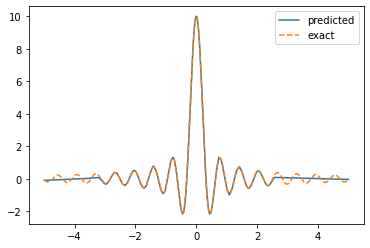

In [54]:
# Display data
import matplotlib.pyplot as plt
res = model.predict(x, verbose=0)
plt.plot(x, res, label='predicted')
plt.plot(x, y, '--', label='exact')
plt.legend()
plt.show()

## **Implement a Dense neural network for a Non-Linear function in more dimensions**
This final example on function fitting is devoted to multi-dimensional functions, in this case we will fit a 3D function. The neural network structure is exactly the one used for the non-linear function, with the only difference in the **dimensionality** of the dataset. 

- Import the required packages

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

- Define the dataset. In this case we will use a 3D non-normalized Gaussian.

In [38]:
def f(x, y):
    return np.exp(-x**2 - y**2)

x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

- Manipulate the data. In order to give the function to the neural network we need to transform it to a one dimensional vector.

In [41]:
Z = np.reshape(Z, (200*200))
XY = np.vstack(map(np.ravel, (X,Y))).T
print(XY)

[[-3.         -3.        ]
 [-2.96984925 -3.        ]
 [-2.93969849 -3.        ]
 ...
 [ 2.93969849  3.        ]
 [ 2.96984925  3.        ]
 [ 3.          3.        ]]


C:\Users\stefa\AppData\Local\Temp\ipykernel_9540\1157274537.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  XY = np.vstack(map(np.ravel, (X,Y))).T


- Define the neural network structure and train the model. We can see that in this case, since it is a ```Dense``` layer, the input shape is ```(2,)```, which means that we are giving a dataset with one single batch and with an undefined number of rows each of which has two features. The output will also be of the same structure.

In [46]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=256, activation='relu', input_shape=(2,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam', metrics='mse')
model.fit(XY, Z, batch_size=32, epochs=10, verbose=0)
model.summary()

- Plot the predicted data together with the initial function.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 256)               768       
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,793
Trainable params: 33,793
Non-trainable params: 0
_________________________________________________________________
1250/1250 [==============================] - 1s 1ms/step


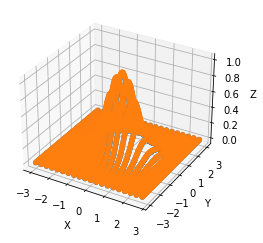

In [20]:
import matplotlib.pyplot as plt
res = model.predict(XY)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XY[::10,0], XY[::10,1], res[::10])
ax.scatter(XY[::10,0], XY[::10,1], Z[::10])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()